#Heart Disease Classification

Revisi :
1. Melakukan proses training pada pycharet dengan perbandingan data latih dan data uji 99:1, karena pada paper tidak dijelaskan pembagian dataset, jadi kami asumsikan mereka langsung membagi data dengan CV 10 atau (90:10) dan tanpa adanya data testing (Hanya mengukur performa training (hanya data Validasi))
2. memebrikan nilai random_State / session_id pada pycaret sebesar 42

##1. Import Library

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pycaret.classification import *

##2. EDA

Link dataset : [dataset](https://drive.google.com/file/d/1o4wwnIaoGpflCnbJsDXpRc1wlzfHAGK7/view?usp=sharing)

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 2.1 Mengecek Balance Data Target

In [ ]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

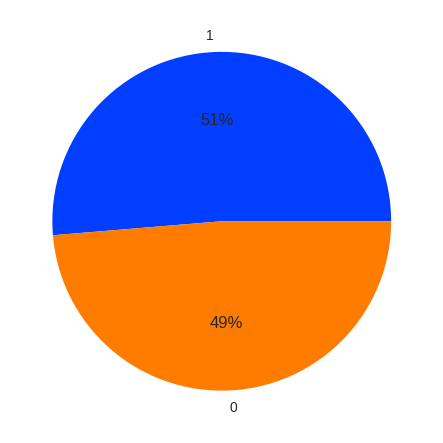

In [ ]:
# declaring data
data = df["target"].value_counts()
# keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, labels=data.index, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

###2.2. Checking Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 2.3. Checking statistik pada dataset

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###2.4. melihat korelasi dataset sebelum dilakukan pembersihan outliers

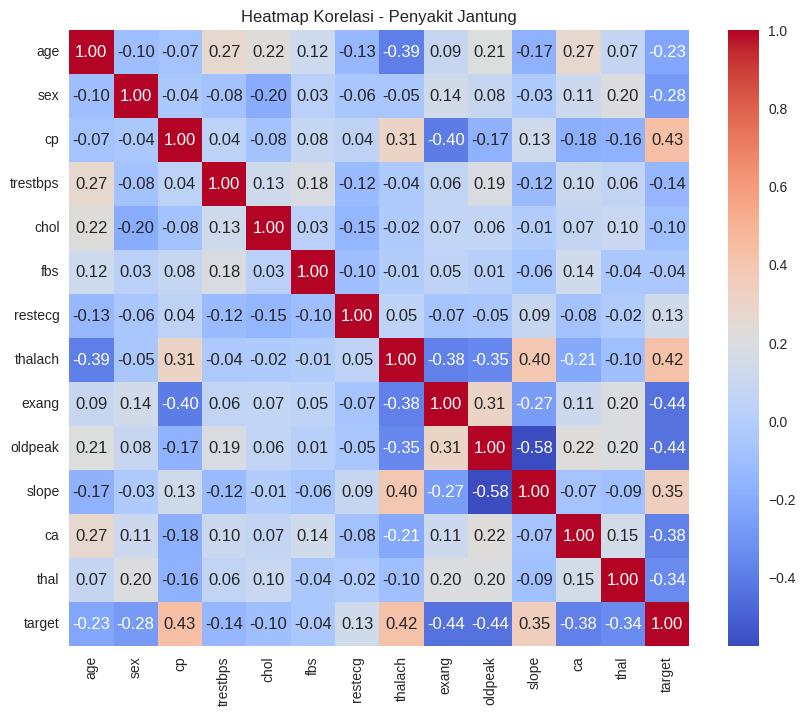

In [ ]:
# Hitung matriks korelasi
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi - Penyakit Jantung")
plt.show()

### 2.5. Menampilkan data distribusi dan box plot sebelum preprocesing

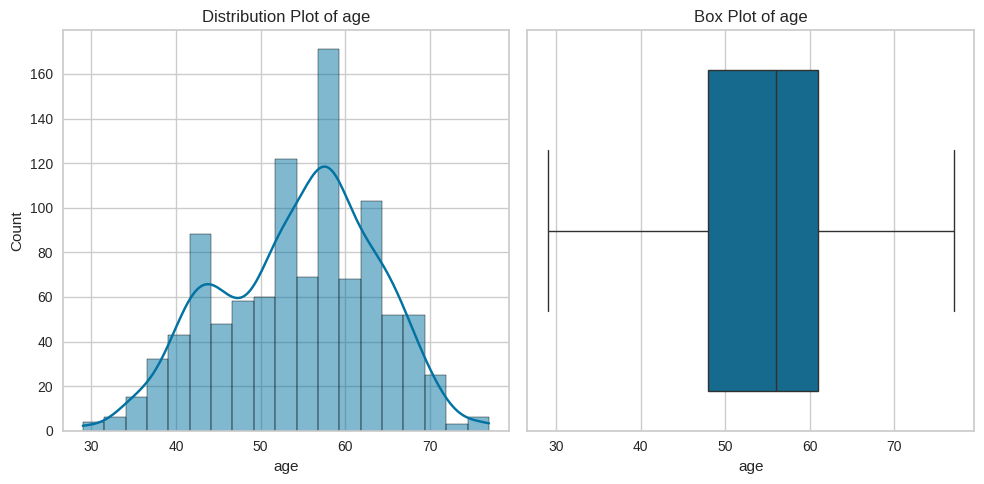

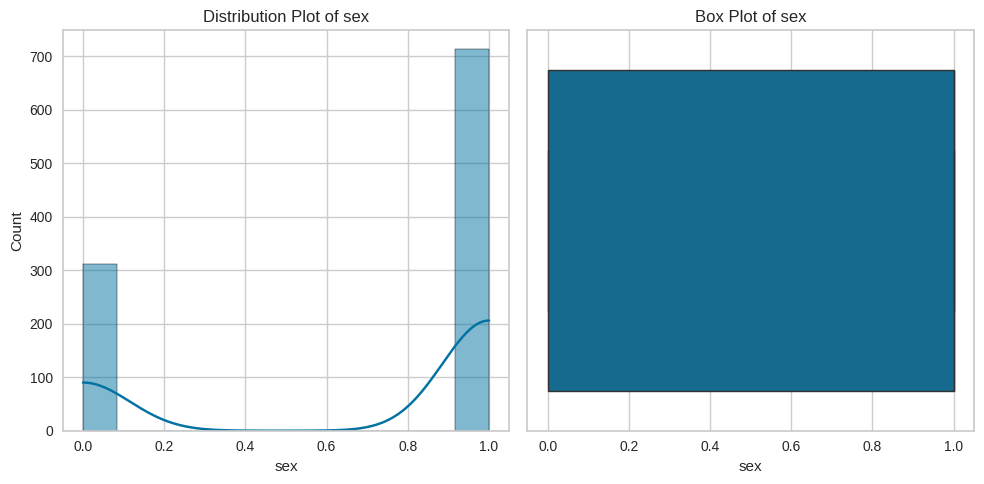

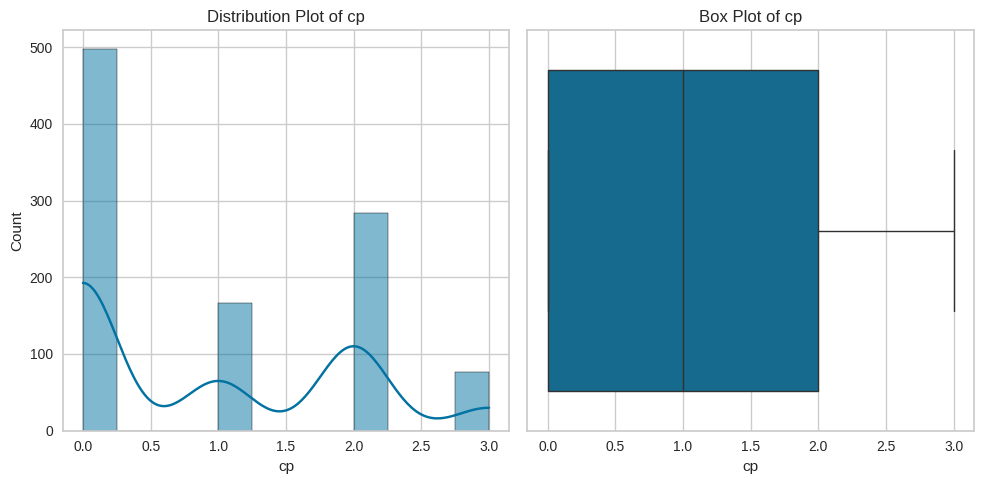

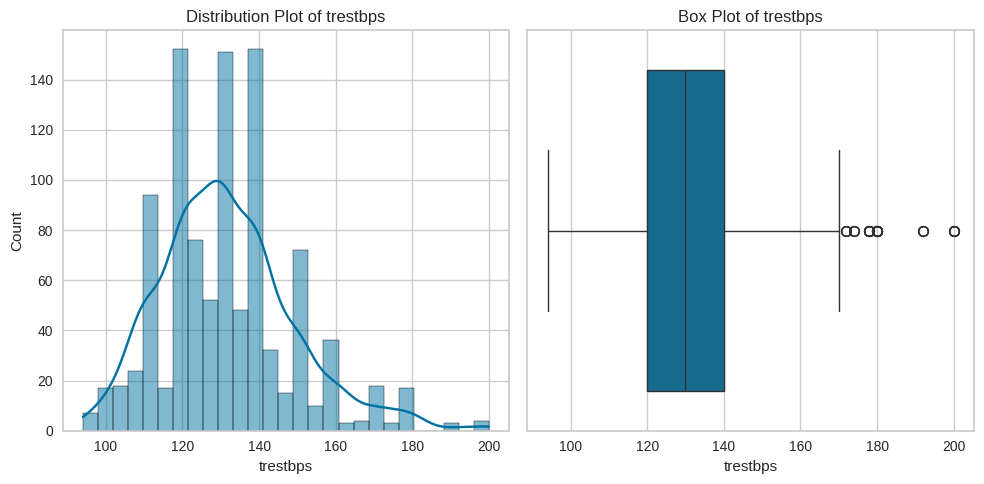

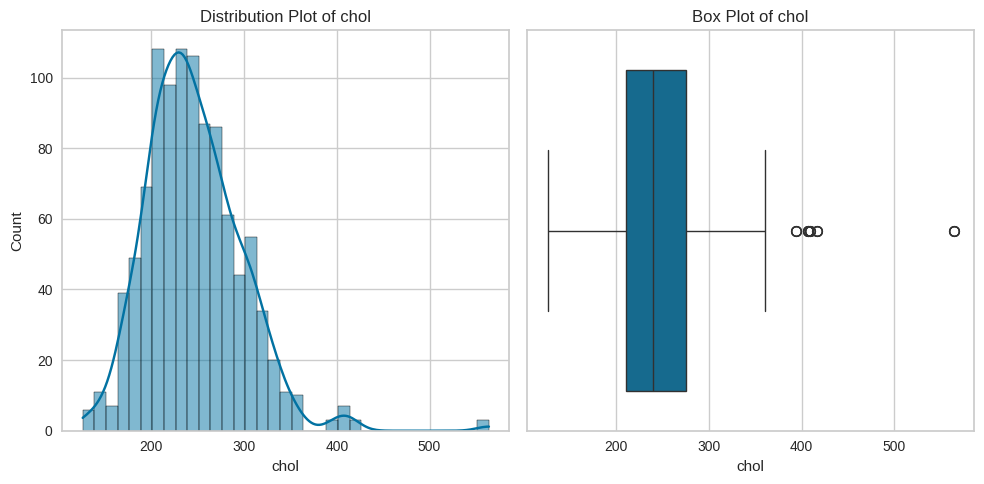

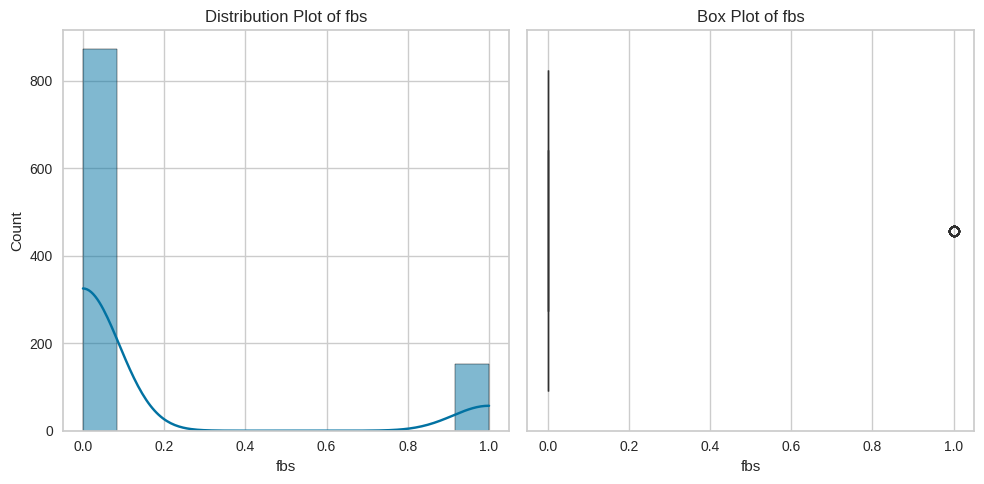

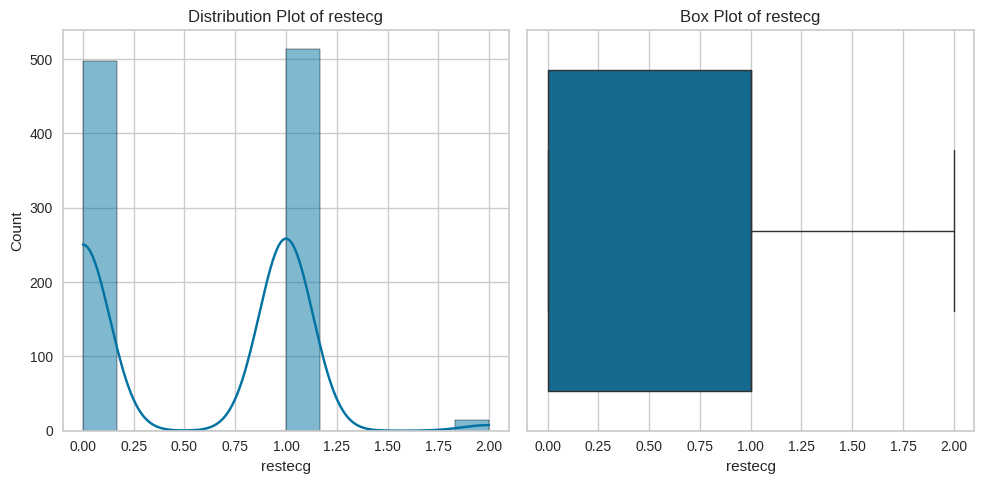

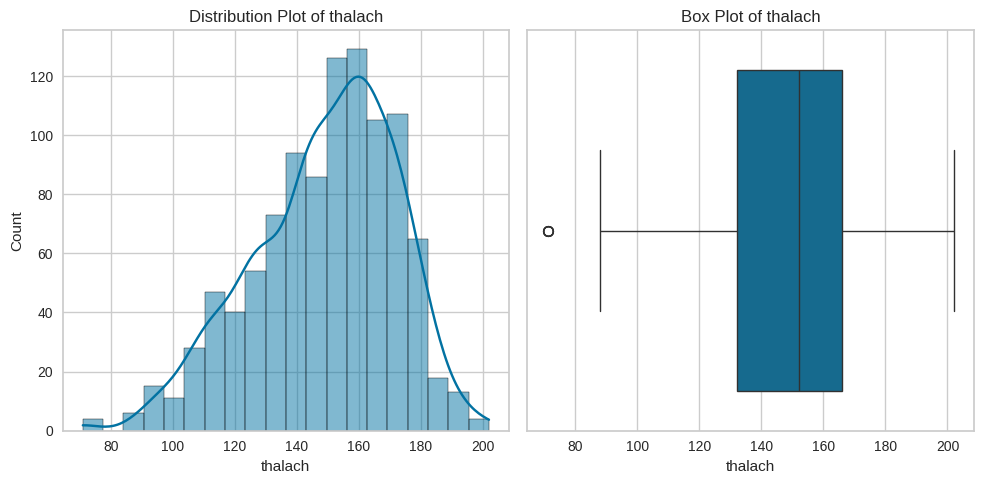

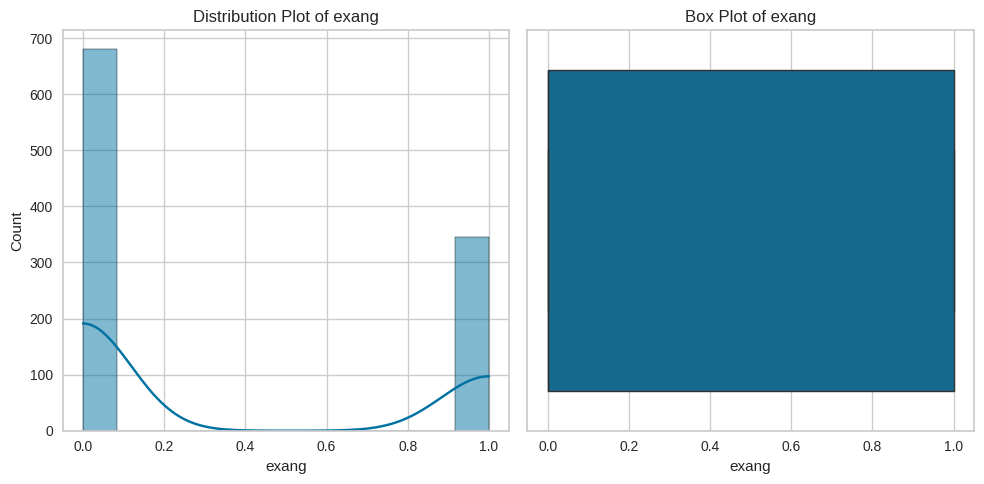

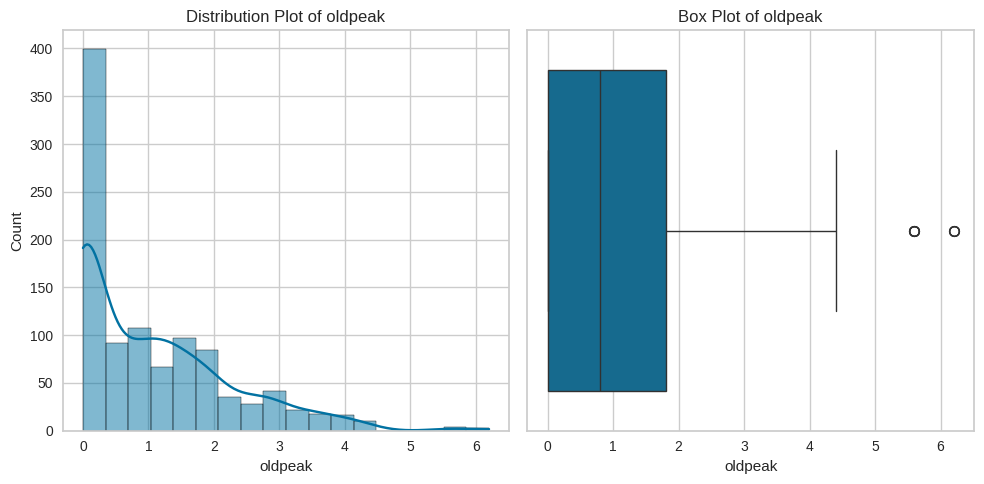

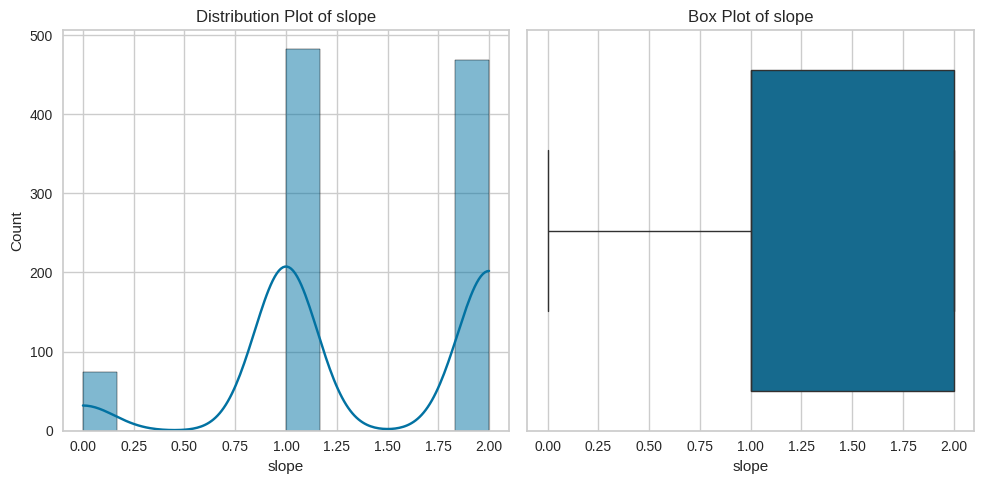

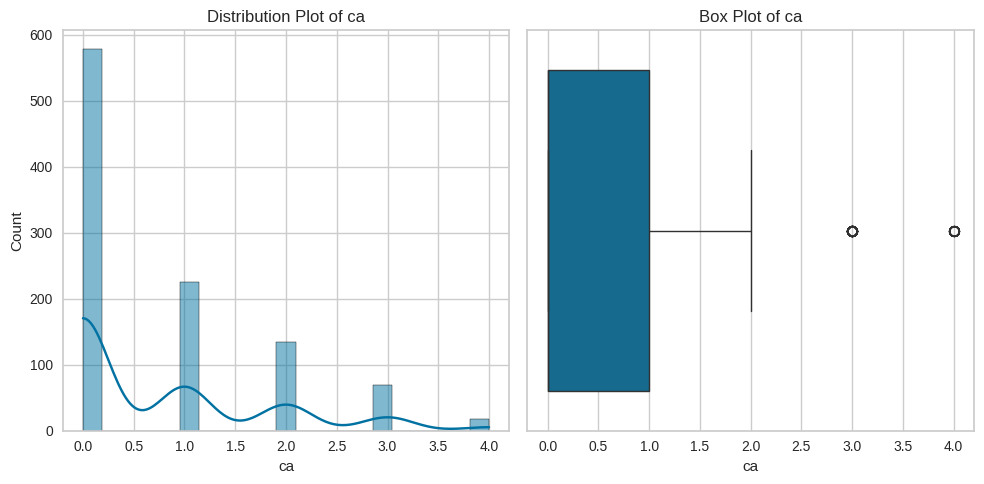

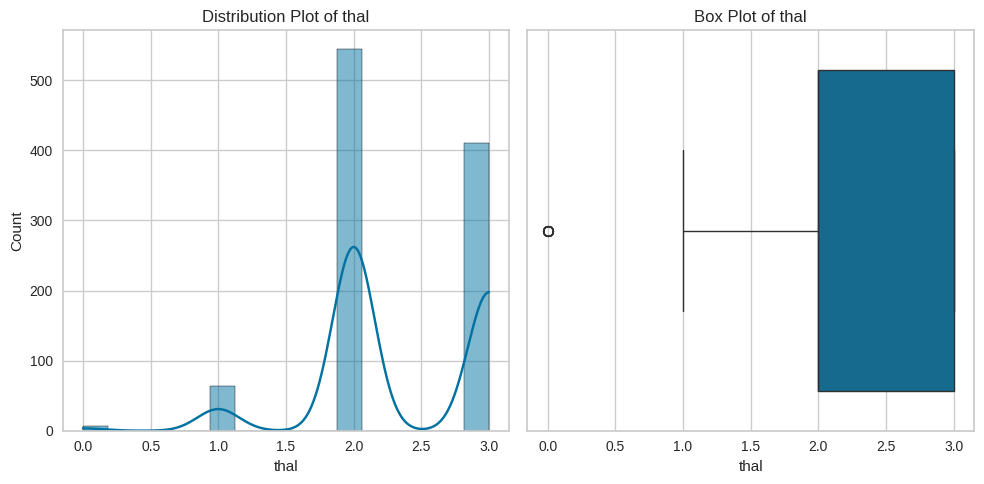

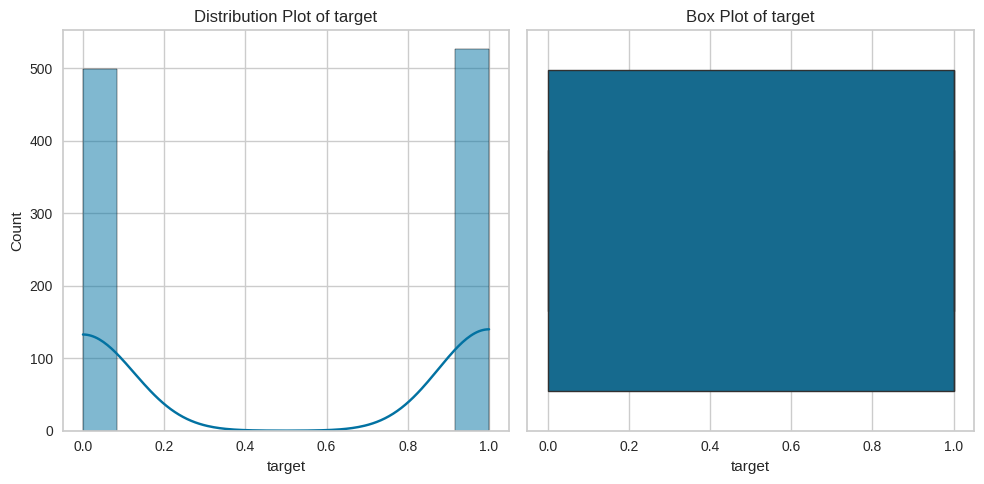

In [ ]:
# List of column names to plot
columns_to_plot = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each column in the list
for column in columns_to_plot:
    # Check if the column exists in the DataFrame and if it is numerical
    if column in df.columns and df[column].dtype in ['int64', 'float64']:
        # Create a figure with subplots
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Distribution plot
        sns.histplot(df[column], ax=axes[0], kde=True)
        axes[0].set_title(f'Distribution Plot of {column}')

        # QQ plot
        #sm.qqplot(df[column], line='s', ax=axes[1])
        #axes[1].set_title(f'QQ Plot of {column}')

        # Box plot
        sns.boxplot(x=df[column], ax=axes[1])
        axes[1].set_title(f'Box Plot of {column}')

        # Adjust layout
        plt.tight_layout()

        # Show the plots
        plt.show()
    else:
        print(f'Column "{column}" not found or not numerical.')

## 3. Data Preprocessing

Metode yang digunakan disebut sebagai Interquartile Range (IQR). Langkah-langkahnya sebagai berikut:

1. Kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data dihitung.
2. Rentang Interquartile (IQR) dihitung sebagai selisih antara Q3 dan Q1.
3. Batas bawah (lower_bound) dan batas atas (upper_bound) ditentukan dengan
4. menambahkan atau mengurangkan 1.5 kali IQR dari Q1 dan Q3.
5. Nilai-nilai yang di luar rentang ini dianggap sebagai outlier dan dihapus dari data.

Dengan cara ini, metode IQR membantu mengidentifikasi dan menghapus nilai-nilai yang signifikan jauh dari pusat data, sehingga meningkatkan kualitas data untuk analisis lebih lanjut.

In [ ]:
def remove_outliers(df, col_names):
    df_cleaned = df.copy()  # Create a copy of the original DataFrame
    for col in col_names:
        q1 = df_cleaned[col].quantile(0.25)
        q3 = df_cleaned[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Usage example
selected_features = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']
df_cleaned = remove_outliers(df, selected_features)

### 3.1. Menampilkan data distribusi dan box plot setelah preprocessing IQR

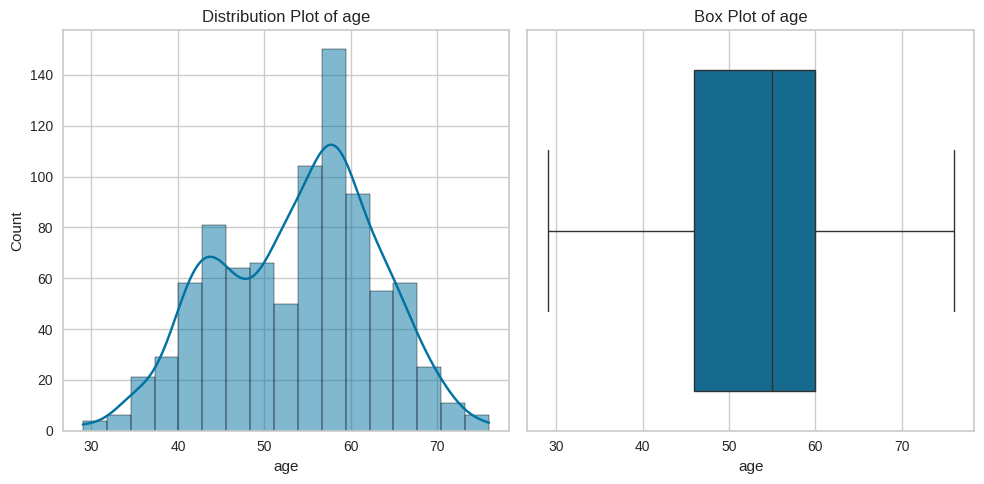

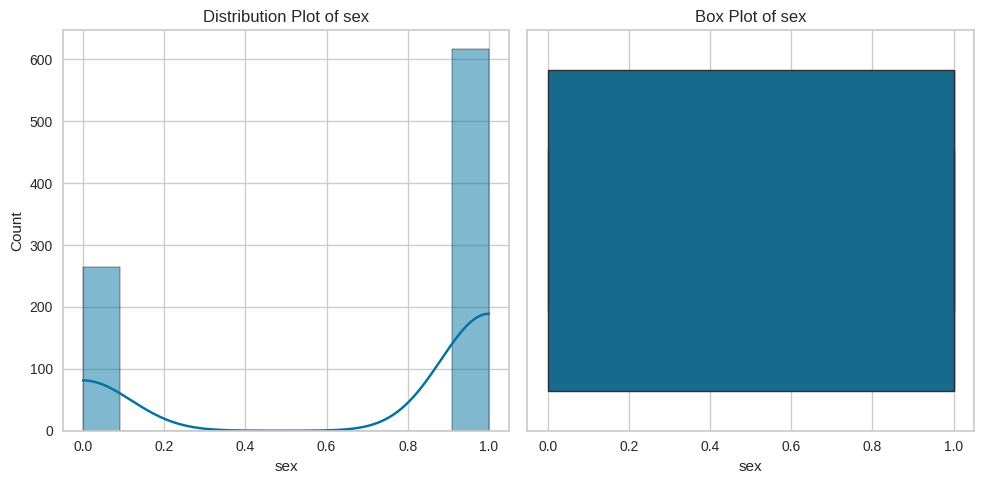

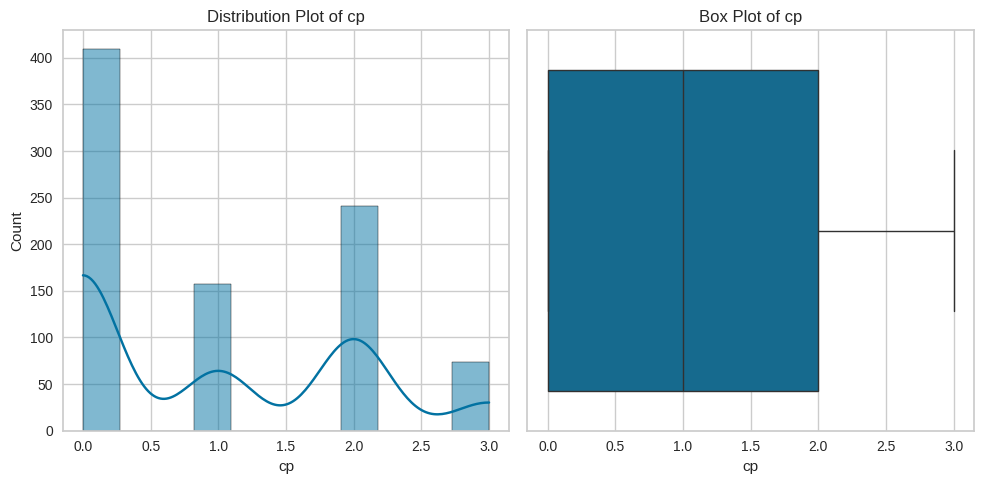

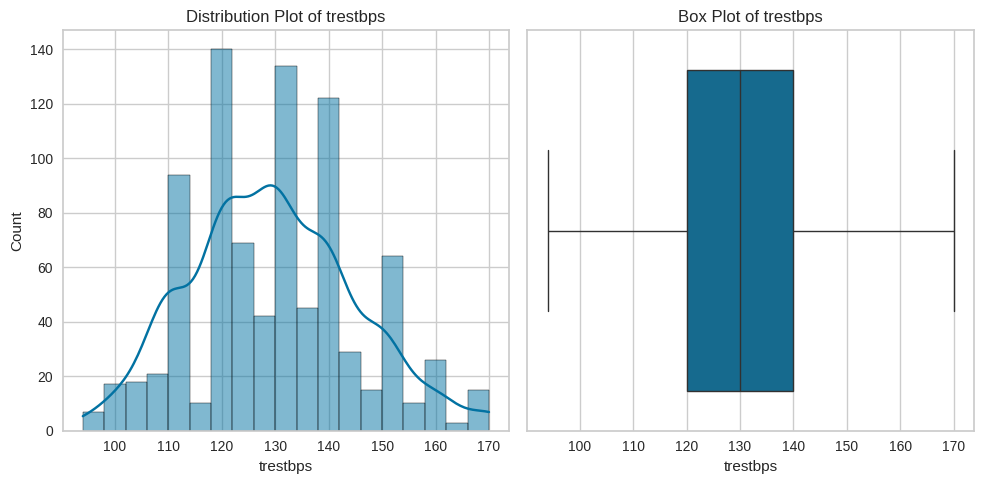

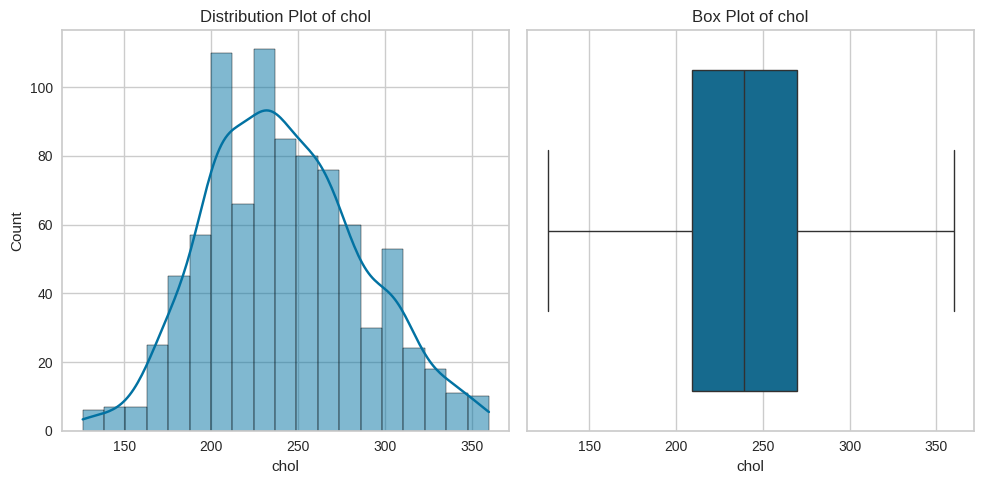

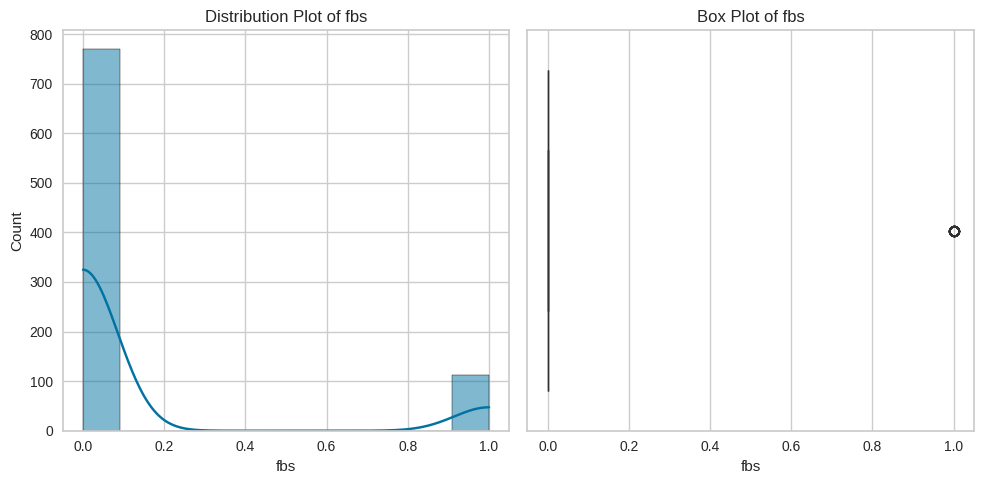

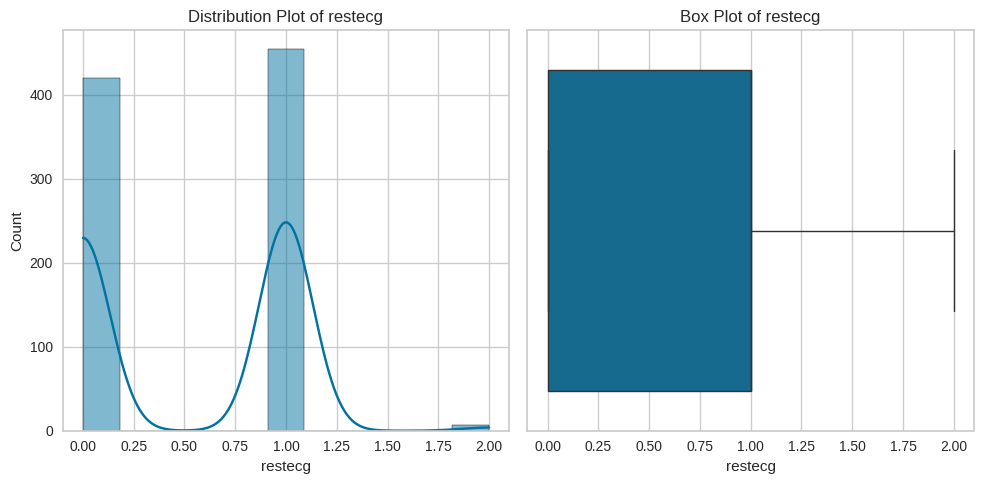

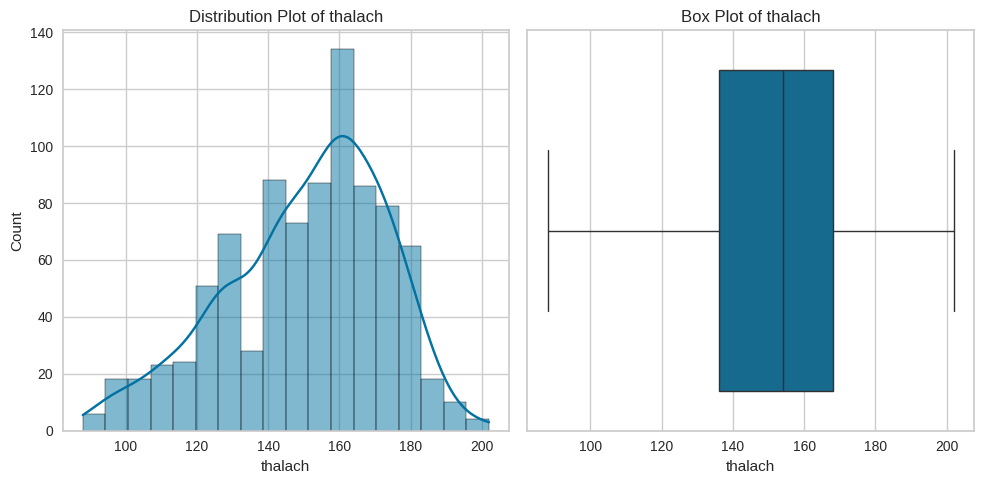

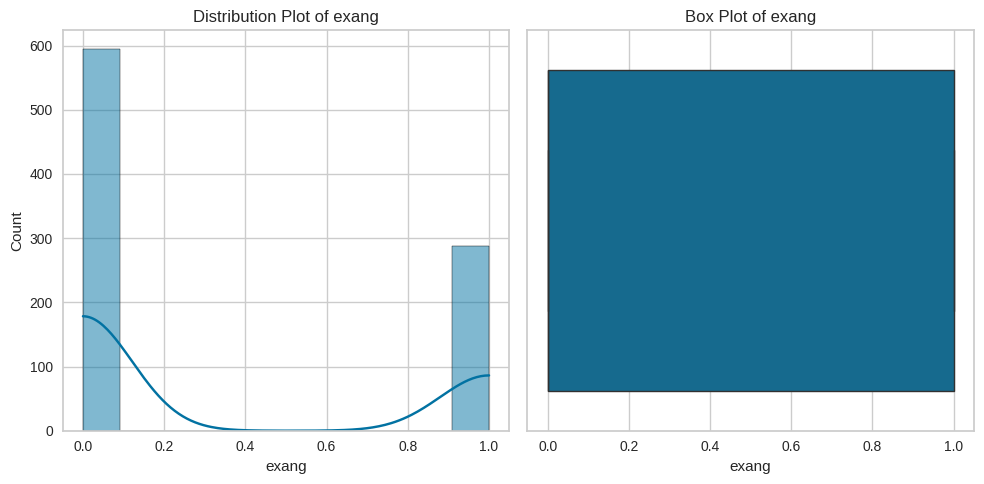

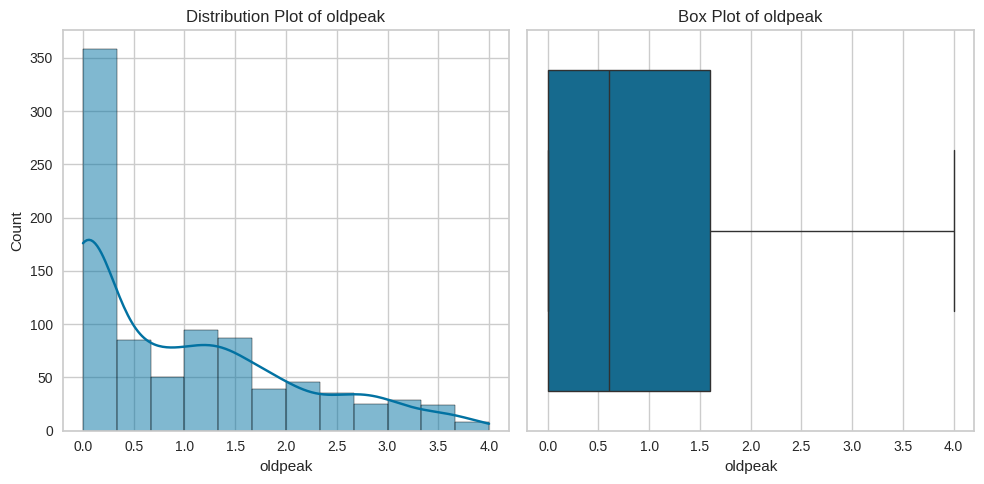

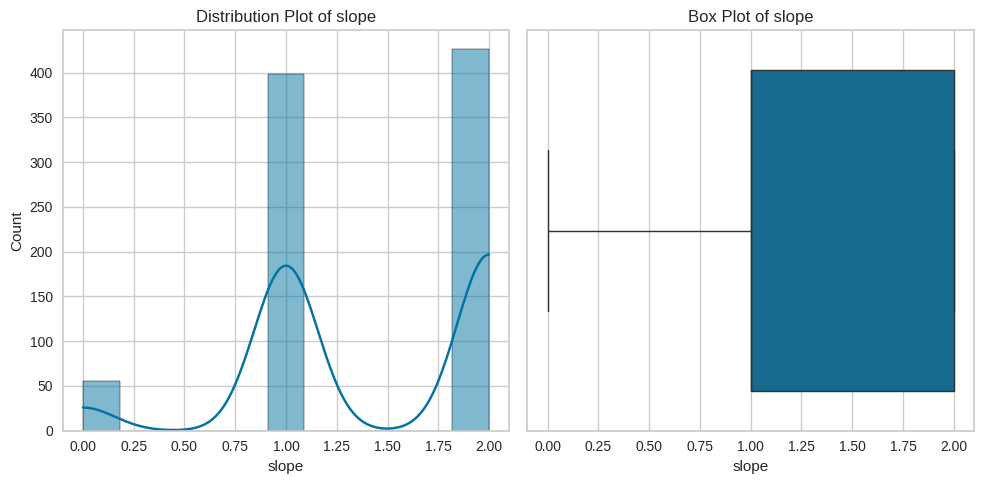

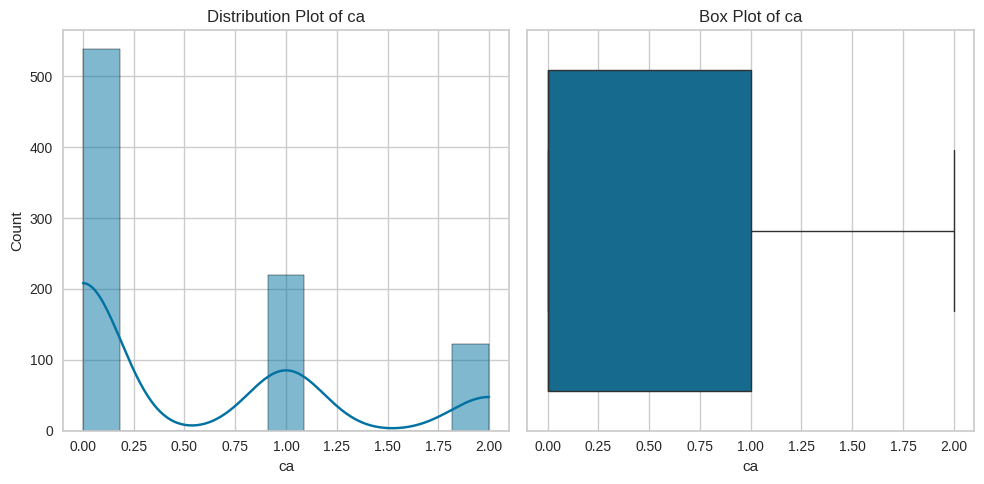

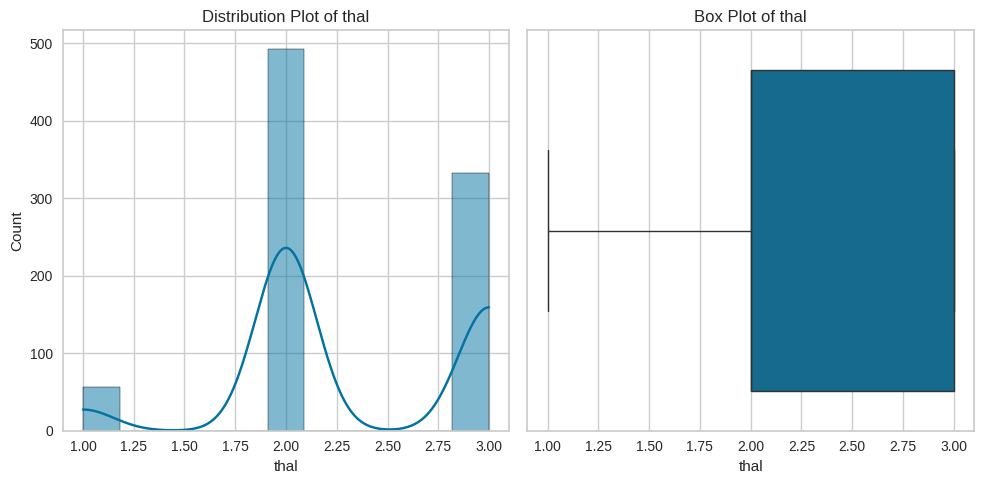

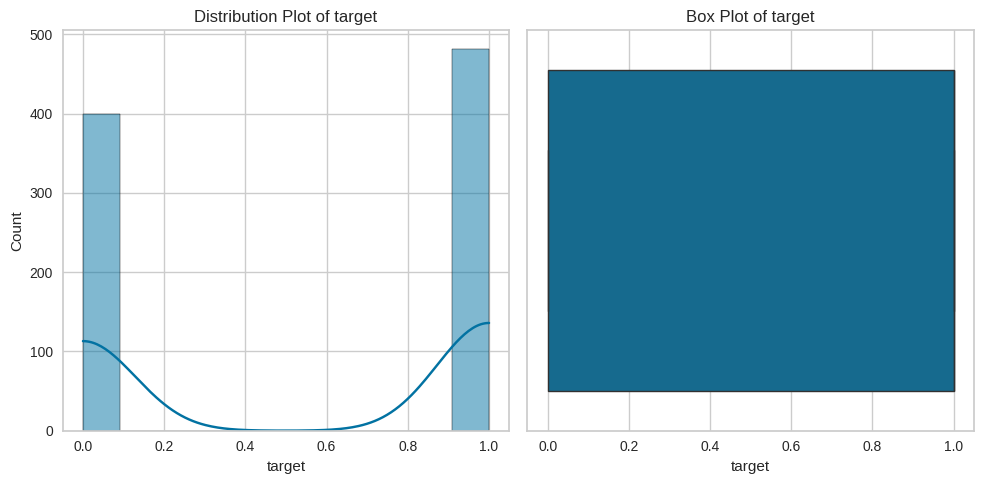

In [ ]:
# List of column names to plot
columns_to_plot = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Loop through each column in the list
for column in columns_to_plot:
    # Check if the column exists in the DataFrame and if it is numerical
    if column in df_cleaned.columns and df_cleaned[column].dtype in ['int64', 'float64']:
        # Create a figure with subplots
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Distribution plot
        sns.histplot(df_cleaned[column], ax=axes[0], kde=True)
        axes[0].set_title(f'Distribution Plot of {column}')

        # QQ plot
        #sm.qqplot(df[column], line='s', ax=axes[1])
        #axes[1].set_title(f'QQ Plot of {column}')

        # Box plot
        sns.boxplot(x=df_cleaned[column], ax=axes[1])
        axes[1].set_title(f'Box Plot of {column}')

        # Adjust layout
        plt.tight_layout()

        # Show the plots
        plt.show()
    else:
        print(f'Column "{column}" not found or not numerical.')

###3.2. Menampilkan heatmap korelasi setelah preprocessing IQR

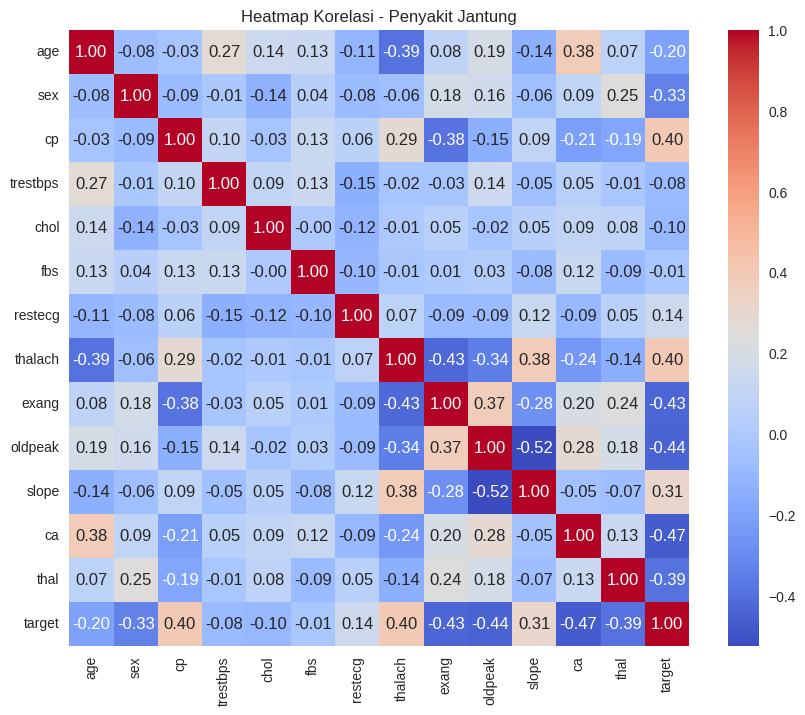

In [ ]:
# Hitung matriks korelasi
corr_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi - Penyakit Jantung")
plt.show()

Hasil Setelah preprocessing sama dengan heatmap yang terdapat dalam jurnal, bisa dilihat dalam gambar di bawah ini:

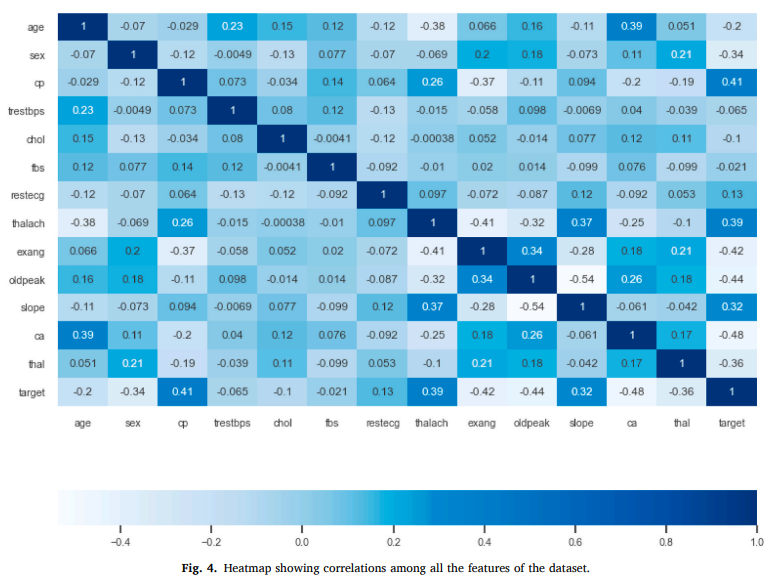

##4. Modelling

###4.1. Pemodelan Pycaret dengan Preprocessing IQR diluar modeling

In [ ]:
# Initialize PyCaret
exp = setup(df_cleaned, target="target", fix_imbalance=True, train_size = 0.99, session_id=42) #tambahkan random number

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(881, 14)"
4,Transformed data shape,"(961, 14)"
5,Transformed train set shape,"(952, 14)"
6,Transformed test set shape,"(9, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Train multiple models and compare their performance
models_to_compare = ['lr', "knn", "dt", "rf", 'ada', 'mlp']
best_model = compare_models(include=models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0440
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1580
ada,Ada Boost Classifier,0.9139,0.9814,0.9242,0.9200,0.9215,0.8261,0.8274,0.1000
lr,Logistic Regression,0.8624,0.9356,0.8948,0.8604,0.8763,0.7211,0.7241,0.1370
mlp,MLP Classifier,0.8463,0.9262,0.8924,0.8418,0.8629,0.6876,0.6969,0.2160
knn,K Neighbors Classifier,0.7935,0.9186,0.7291,0.8751,0.7944,0.5901,0.6014,0.0680


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
# Tune hyperparameters of the best model
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9997,0.9167,1.0000,0.9565,0.9091,0.9129
1,0.9205,0.9906,0.9167,0.9362,0.9263,0.8399,0.8401
2,0.9425,0.9947,0.9787,0.9200,0.9485,0.8837,0.8858
3,0.9425,0.9952,0.9149,0.9773,0.9451,0.8850,0.8871
4,0.9195,0.9907,0.8936,0.9545,0.9231,0.8389,0.8409
5,0.9080,0.9907,0.8511,0.9756,0.9091,0.8169,0.8247
6,0.9080,0.9917,0.9375,0.9000,0.9184,0.8132,0.8141
7,0.9655,0.9979,0.9792,0.9592,0.9691,0.9301,0.9304
8,0.9310,0.9957,0.9167,0.9565,0.9362,0.8612,0.8622


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Evaluate model performance
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

###4.2. Pemodelan Pycaret dengan preprocessing IQR didalam modeling

In [ ]:
# Model-model yang ingin dibandingkan
models_to_compare = ['lr', "knn", "dt", "rf", 'ada', 'mlp']

# Setup PyCaret dengan preprocessing IQR
exp = setup(df, target="target", fix_imbalance=True, preprocess='iqr',train_size = 0.99, session_id=42)

# Bandingkan performa model-model yang dipilih
best_model = compare_models(include=models_to_compare)


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(1025, 14)"
4,Transformed data shape,"(1051, 14)"
5,Transformed train set shape,"(1040, 14)"
6,Transformed test set shape,"(11, 14)"
7,Numeric features,13
8,Preprocess,iqr
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1820
dt,Decision Tree Classifier,0.9971,0.9971,0.9942,1.0000,0.9970,0.9941,0.9943,0.0300
ada,Ada Boost Classifier,0.9044,0.9648,0.9019,0.9130,0.9063,0.8087,0.8109,0.1370
mlp,MLP Classifier,0.8432,0.9238,0.8692,0.8424,0.8497,0.6857,0.6960,0.2230
lr,Logistic Regression,0.8392,0.9163,0.8769,0.8239,0.8483,0.6777,0.6820,0.1350
knn,K Neighbors Classifier,0.7654,0.8925,0.7308,0.7969,0.7598,0.5317,0.5362,0.0450


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

### Pemodelan SKlearn Tanpa Pycaret

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Definisikan data dan target
X = df_cleaned.iloc[:,:-1]
y = df_cleaned.iloc[:,-1]

# Inisialisasi model-model
models = {
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'ada': AdaBoostClassifier(),
    'lr': LogisticRegression(),
    'mlp': MLPClassifier(),
    'knn': KNeighborsClassifier()
}

# Menentukan metrik yang diinginkan
scoring = ['accuracy', 'roc_auc', 'recall', 'precision', 'f1']

# Lakukan cross-validation dengan 10 folds
results = []
for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=10, scoring=scoring)
    mean_scores = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring}
    results.append([name, mean_scores['accuracy'], mean_scores['roc_auc'], mean_scores['recall'],
                    mean_scores['precision'], mean_scores['f1']])

# Buat DataFrame dari hasil
hasil = pd.DataFrame(results, columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Precision', 'F1'])


In [ ]:
hasil

,Model,Accuracy,AUC,Recall,Precision,F1
0,dt,1.000000,1.000000,1.000000,1.000000,1.000000
1,rf,1.000000,1.000000,1.000000,1.000000,1.000000
2,ada,0.913700,0.979757,0.931420,0.913519,0.922054
3,lr,0.863751,0.930528,0.923044,0.843488,0.881017
4,mlp,0.838802,0.922007,0.923087,0.814993,0.862932
5,knn,0.758261,0.889626,0.733971,0.806851,0.767062
